In [215]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None 
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df_train=pd.read_csv('train_data.csv')
df_test=pd.read_csv('test_data.csv')

df_train.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,nan,nan,nan,360.000000,not_neg,not_int,not_lpsm,118000.000000,sb,pr,home,1U,1740.000000,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.000000
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,nan,nan,nan,360.000000,not_neg,not_int,lpsm,nan,sb,pr,home,1U,4980.000000,EQUI,552,EXP,55-64,to_inst,nan,North,direct,1,nan
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560000,0.200000,595.000000,360.000000,neg_amm,not_int,not_lpsm,508000.000000,sb,pr,home,1U,9480.000000,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.000000
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250000,0.681000,nan,360.000000,not_neg,not_int,not_lpsm,658000.000000,sb,pr,home,1U,11880.000000,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.000000
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000000,0.304200,0.000000,360.000000,not_neg,not_int,not_lpsm,758000.000000,sb,pr,home,1U,10440.000000,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.000000


In [189]:
df_train=pd.read_csv('train_data.csv')

In [7]:
print('The shape of training dataset is :',df_train.shape[0],'rows')
print('The shape of training dataset is :',df_train.shape[1],'columns')

The shape of training dataset is : 148670 rows
The shape of training dataset is : 34 columns


In [9]:
df_train.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [10]:
df_train['Gender'].unique()

array(['Sex Not Available', 'Male', 'Joint', 'Female'], dtype=object)

In [16]:
df_train.dtypes

year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
age                           object
s

In [18]:
df_train['year'].nunique()   #drop year

1

In [190]:
df_train.drop(['ID','year'],1,inplace=True)

In [24]:
df_train['Gender'].value_counts()

Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64

In [191]:
df_train_num=df_train.select_dtypes(include=np.number).drop('Status',1)
df_train_cat=df_train.select_dtypes(include=object)

print('The number of numerical variables are :',df_train_num.shape[1])
print('The number of categorical variables are :',df_train_cat.shape[1])

The number of numerical variables are : 10
The number of categorical variables are : 21


In [5]:
def impute(x):
    for i in df_train_num.columns:
        iqr = 1.5*(df_train_num[i].quantile(0.75) - df_train_num[i].quantile(0.25))
        ul = df_train_num[i].quantile(0.75) + iqr
        ll = df_train_num[i].quantile(0.25) - iqr
        temp = []
        for j in df_train_num[i].index:
            if df_train_num[i][j] > ul or df_train_num[i][j] < ll :
                temp.append(np.median(df_train_num[i]))
            elif df_train_num[i][j] < 0:
                temp.append(0)
            else:
                temp.append(df_train_num[i][j])
        df_train_num[i]= temp
    return df_train_num


In [6]:
df_train_num[['loan_amount', 'rate_of_interest', 'Interest_rate_spread','Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'dtir1']] = impute(df_train_num[['loan_amount', 'rate_of_interest', 'Interest_rate_spread','Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'dtir1']])

In [192]:
df_train_num['rate_of_interest']=df_train_num['rate_of_interest'].fillna(df_train_num['rate_of_interest'].mean())
df_train_num['Interest_rate_spread']=df_train_num['Interest_rate_spread'].fillna(df_train_num['Interest_rate_spread'].median())
df_train_num['Upfront_charges']=df_train_num['Upfront_charges'].fillna(df_train_num['Upfront_charges'].median())
df_train_num['term']=df_train_num['term'].fillna(df_train_num['term'].median())
df_train_num['property_value']=df_train_num['property_value'].fillna(df_train_num['property_value'].median())
df_train_num['income']=df_train_num['income'].fillna(df_train_num['income'].median())
df_train_num['LTV']=df_train_num['LTV'].fillna(df_train_num['LTV'].median())
df_train_num['dtir1']=df_train_num['dtir1'].fillna(df_train_num['dtir1'].median())


In [67]:
df_train_num.isnull().sum()

loan_amount             0
rate_of_interest        0
Interest_rate_spread    0
Upfront_charges         0
term                    0
property_value          0
income                  0
Credit_Score            0
LTV                     0
dtir1                   0
dtype: int64

In [32]:
df_train_cat.mode().T

,0
loan_limit,cf
Gender,Male
approv_in_adv,nopre
loan_type,type1
loan_purpose,p3
Credit_Worthiness,l1
open_credit,nopc
business_or_commercial,nob/c
Neg_ammortization,not_neg
interest_only,not_int


In [193]:
df_train_cat['loan_limit']=df_train_cat['loan_limit'].fillna('cf')
df_train_cat['approv_in_adv']=df_train_cat['approv_in_adv'].fillna('nopre')
df_train_cat['loan_purpose']=df_train_cat['loan_purpose'].fillna('p3')
df_train_cat['Neg_ammortization']=df_train_cat['Neg_ammortization'].fillna('not_neg')
df_train_cat['age']=df_train_cat['age'].fillna('45-54')
df_train_cat['submission_of_application']=df_train_cat['submission_of_application'].fillna('to_inst')

In [35]:
df_train_cat.isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region                       0
Security_Type                0
dtype: int64

In [44]:
df_train_cat.nunique()

loan_limit                   2
Gender                       4
approv_in_adv                2
loan_type                    3
loan_purpose                 4
Credit_Worthiness            2
open_credit                  2
business_or_commercial       2
Neg_ammortization            2
interest_only                2
lump_sum_payment             2
construction_type            2
occupancy_type               3
Secured_by                   2
total_units                  4
credit_type                  4
co-applicant_credit_type     2
age                          7
submission_of_application    2
Region                       4
Security_Type                2
dtype: int64

In [194]:
le=LabelEncoder()
age_label=pd.DataFrame(le.fit_transform(df_train_cat['age']),columns=['age'])
age_label.head()

,age
0,0
1,3
2,1
3,2
4,0


In [195]:
df_train_cat_dummies=pd.get_dummies(df_train_cat.drop('age',1),drop_first=True)
df_train_cat_dummies.shape

(148670, 32)

In [196]:
ss=StandardScaler()
df_train_num_scaled=pd.DataFrame(ss.fit_transform(df_train_num),columns=df_train_num.columns)
df_train_num_scaled.shape

(148670, 10)

In [197]:
df_train_final=pd.concat([df_train_num_scaled,age_label,df_train_cat_dummies],axis=1)
df_train_final.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1,age,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l2,open_credit_opc,business_or_commercial_nob/c,Neg_ammortization_not_neg,interest_only_not_int,lump_sum_payment_not_lpsm,construction_type_sb,occupancy_type_pr,occupancy_type_sr,Secured_by_land,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,-1.166980,-0.000000,-0.086619,-0.164744,0.425609,-1.087010,-0.816446,0.502357,0.679317,0.730747,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1
1,-0.677607,-0.000000,-0.086619,-0.164744,0.425609,-0.209870,-0.302164,-1.275413,0.056657,0.109847,3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1
2,0.409890,1.054866,-0.513616,-0.880068,0.425609,0.053272,0.412116,1.158234,0.185549,0.834231,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1
3,0.681764,0.419311,0.565089,-0.164744,0.425609,0.491841,0.793066,-0.973365,-0.095333,0.420297,2,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1.986759,-0.093233,-0.279934,-1.092723,0.425609,0.784221,0.564496,-0.843916,0.498737,0.109847,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1


In [13]:
X=df_train_final
y=df_train['Status']

print('Before smote label 1:',sum(y==1))
print('Before smote label 0:',sum(y==0))

Before smote label 1: 36639
Before smote label 0: 112031


sm=SMOTE()
X_bal,y_bal=sm.fit_resample(X,y)

print('After smote label 1:',sum(y_bal==1))
print('After smote label 0:',sum(y_bal==0))

lr=LogisticRegression()
lr_model=lr.fit(X_bal,y_bal)
lr_model.score(X_bal,y_bal)

In [145]:
lr=LogisticRegression()
lr_model=lr.fit(X,y)
lr_model.score(X,y)

0.8730880473531983

In [146]:
ypred_train=lr_model.predict(X)
ypred_train

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
f1_score(y_bal,ypred_train)

0.7956428264296976

In [82]:
print(classification_report(y_bal,ypred_train))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82    112031
           1       0.86      0.74      0.80    112031

    accuracy                           0.81    224062
   macro avg       0.81      0.81      0.81    224062
weighted avg       0.81      0.81      0.81    224062



In [177]:
df_test.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,173560,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,266500,4.125000,0.586200,1288.960000,240.000000,not_neg,not_int,not_lpsm,308000.000000,sb,pr,home,1U,9480.000000,EXP,502,CIB,55-64,not_inst,86.525974,North,direct,18.000000
1,173561,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,116500,4.990000,0.697900,1875.000000,360.000000,neg_amm,not_int,not_lpsm,188000.000000,sb,pr,home,1U,1620.000000,EXP,526,CIB,55-64,to_inst,61.968085,south,direct,38.000000
2,173562,2019,cf,Joint,nopre,type2,p1,l1,nopc,b/c,196500,nan,nan,nan,360.000000,not_neg,not_int,not_lpsm,208000.000000,sb,pr,home,1U,3240.000000,CRIF,827,EXP,<25,to_inst,94.471154,North,direct,59.000000
3,173563,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,116500,4.750000,0.520300,1329.030000,360.000000,neg_amm,not_int,not_lpsm,128000.000000,sb,pr,home,1U,2100.000000,EXP,591,CIB,55-64,to_inst,91.015625,North,direct,42.000000
4,173564,2019,cf,Joint,nopre,type2,p3,l1,nopc,b/c,306500,nan,nan,nan,360.000000,neg_amm,not_int,not_lpsm,318000.000000,sb,pr,home,1U,6180.000000,EXP,598,EXP,35-44,to_inst,96.383648,North,direct,47.000000


In [178]:
df_test.drop(['ID','year'],1,inplace=True)

In [179]:
df_test_num=df_test.select_dtypes(include=np.number)
df_test_cat=df_test.select_dtypes(include=object)

print('The number of numerical variables in test are :',df_test_num.shape[1])
print('The number of categorical variables in test are :',df_test_cat.shape[1])

The number of numerical variables in test are : 10
The number of categorical variables in test are : 21


In [180]:
df_test_num.isnull().sum()

loan_amount                 0
rate_of_interest        15573
Interest_rate_spread    15662
Upfront_charges         16967
term                       14
property_value           6324
income                   3889
Credit_Score                0
LTV                      6324
dtir1                   10153
dtype: int64

In [57]:
def impute_test(x):
    for i in df_test_num.columns:
        iqr = 1.5*(df_test_num[i].quantile(0.75) - df_test_num[i].quantile(0.25))
        ul = df_test_num[i].quantile(0.75) + iqr
        ll = df_test_num[i].quantile(0.25) - iqr
        temp = []
        for j in df_test_num[i].index:
            if df_test_num[i][j] > ul or df_test_num[i][j] < ll :
                temp.append(np.median(df_test_num[i]))
            elif df_test_num[i][j] < 0:
                temp.append(0)
            else:
                temp.append(df_test_num[i][j])
        df_test_num[i]= temp
    return df_test_num


In [58]:
df_test_num[['loan_amount', 'rate_of_interest', 'Interest_rate_spread','Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'dtir1']] = impute(df_test_num[['loan_amount', 'rate_of_interest', 'Interest_rate_spread','Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'dtir1']])

In [181]:
df_test_num['rate_of_interest']=df_test_num['rate_of_interest'].fillna(df_test_num['rate_of_interest'].mean())
df_test_num['Interest_rate_spread']=df_test_num['Interest_rate_spread'].fillna(df_test_num['Interest_rate_spread'].median())
df_test_num['Upfront_charges']=df_test_num['Upfront_charges'].fillna(df_test_num['Upfront_charges'].median())
df_test_num['term']=df_test_num['term'].fillna(df_test_num['term'].median())
df_test_num['property_value']=df_test_num['property_value'].fillna(df_test_num['property_value'].median())
df_test_num['income']=df_train_num['income'].fillna(df_test_num['income'].median())
df_test_num['LTV']=df_test_num['LTV'].fillna(df_test_num['LTV'].median())
df_test_num['dtir1']=df_test_num['dtir1'].fillna(df_test_num['dtir1'].median())


In [115]:
df_test_cat.mode()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,cf,Male,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,CIB,CIB,45-54,to_inst,North,direct


In [182]:
df_test_cat['loan_limit']=df_test_cat['loan_limit'].fillna('cf')
df_test_cat['approv_in_adv']=df_test_cat['approv_in_adv'].fillna('nopre')
df_test_cat['loan_purpose']=df_test_cat['loan_purpose'].fillna('p3')
df_test_cat['Neg_ammortization']=df_test_cat['Neg_ammortization'].fillna('not_neg')
df_test_cat['age']=df_test_cat['age'].fillna('45-54')
df_test_cat['submission_of_application']=df_test_cat['submission_of_application'].fillna('to_inst')

In [183]:
le=LabelEncoder()
age_label_2=pd.DataFrame(le.fit_transform(df_test_cat['age']),columns=['age'])
age_label_2.head()

,age
0,3
1,3
2,5
3,3
4,1


In [184]:
df_test_cat_dummies=pd.get_dummies(df_test_cat.drop('age',1),drop_first=True)
df_test_cat_dummies.head()

,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l2,open_credit_opc,business_or_commercial_nob/c,Neg_ammortization_not_neg,interest_only_not_int,lump_sum_payment_not_lpsm,construction_type_sb,occupancy_type_pr,occupancy_type_sr,Secured_by_land,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1
2,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1


In [185]:
ss=StandardScaler()
df_test_num_scaled=pd.DataFrame(ss.fit_transform(df_test_num),columns=df_test_num.columns)
df_test_num_scaled.shape

(63717, 10)

In [186]:
df_test_final=pd.concat([df_test_num_scaled,age_label_2,df_test_cat_dummies],axis=1)
df_test_final.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1,age,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l2,open_credit_opc,business_or_commercial_nob/c,Neg_ammortization_not_neg,interest_only_not_int,lump_sum_payment_not_lpsm,construction_type_sb,occupancy_type_pr,occupancy_type_sr,Secured_by_land,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,-0.351832,0.166634,0.357805,-0.622890,-1.631753,-0.524488,-1.558357,-1.711335,0.266411,-2.057612,3,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,-1.158243,1.941540,0.607918,-0.411067,0.422944,-0.864893,-0.265089,-1.504588,-0.221886,0.008696,3,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1
2,-0.728157,-0.000000,-0.089801,-0.170186,0.422944,-0.808159,1.531117,1.088358,0.424389,2.178319,5,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1
3,-1.158243,1.449081,0.210245,-0.608407,0.422944,-1.035096,2.489093,-0.944650,0.355681,0.421957,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
4,-0.136789,-0.000000,-0.089801,-0.170186,0.422944,-0.496121,1.914308,-0.884348,0.462416,0.938534,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1


In [202]:
ypred_lr=lr_model.predict(df_test_final)
ypred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
rfe_model= RFE(estimator=lr,n_features_to_select=8)
rfe_model=rfe_model.fit(X_bal,y_bal)

rank=pd.Series(rfe_model.ranking_,index=X_bal.columns)
rank[rank==1]

In [96]:
forw_model=sfs(estimator=lr,forward=True,k_features='best',cv=5,scoring='accuracy')
forw_model=forw_model.fit(X_bal,y_bal)
signi_feat_forw=list(forw_model.k_feature_names_)


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

rf=RandomForestClassifier()
rf_model=rf.fit(X_bal,y_bal)
ypred_train_rf=rf_model.predict(X_bal)
f1_score(y_bal,ypred_train_rf)

print(classification_report(y_bal,ypred_train_rf))

In [102]:
df_test_1=pd.read_csv('test_data.csv')
df_test_1

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,173560,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,266500,4.125000,0.586200,1288.960000,240.000000,not_neg,not_int,not_lpsm,308000.000000,sb,pr,home,1U,9480.000000,EXP,502,CIB,55-64,not_inst,86.525974,North,direct,18.000000
1,173561,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,116500,4.990000,0.697900,1875.000000,360.000000,neg_amm,not_int,not_lpsm,188000.000000,sb,pr,home,1U,1620.000000,EXP,526,CIB,55-64,to_inst,61.968085,south,direct,38.000000
2,173562,2019,cf,Joint,nopre,type2,p1,l1,nopc,b/c,196500,nan,nan,nan,360.000000,not_neg,not_int,not_lpsm,208000.000000,sb,pr,home,1U,3240.000000,CRIF,827,EXP,<25,to_inst,94.471154,North,direct,59.000000
3,173563,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,116500,4.750000,0.520300,1329.030000,360.000000,neg_amm,not_int,not_lpsm,128000.000000,sb,pr,home,1U,2100.000000,EXP,591,CIB,55-64,to_inst,91.015625,North,direct,42.000000
4,173564,2019,cf,Joint,nopre,type2,p3,l1,nopc,b/c,306500,nan,nan,nan,360.000000,neg_amm,not_int,not_lpsm,318000.000000,sb,pr,home,1U,6180.000000,EXP,598,EXP,35-44,to_inst,96.383648,North,direct,47.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63712,237272,2019,cf,Male,nopre,type1,p3,l1,nopc,nob/c,206500,4.990000,0.454000,1400.000000,360.000000,not_neg,not_int,not_lpsm,678000.000000,sb,pr,home,1U,7920.000000,CRIF,597,EXP,65-74,to_inst,30.457227,North,direct,48.000000
63713,237273,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,3.990000,0.402000,0.000000,360.000000,not_neg,not_int,not_lpsm,618000.000000,sb,pr,home,1U,5760.000000,CIB,632,CIB,45-54,not_inst,73.867314,North,direct,39.000000
63714,237274,2019,cf,Joint,nopre,type1,p4,l1,nopc,nob/c,416500,3.250000,0.122000,0.000000,180.000000,not_neg,not_int,lpsm,648000.000000,sb,pr,home,1U,11580.000000,EXP,605,EXP,35-44,not_inst,64.274691,North,direct,36.000000
63715,237275,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.875000,1.010400,0.000000,360.000000,not_neg,not_int,not_lpsm,608000.000000,sb,ir,home,1U,6540.000000,CIB,545,CIB,35-44,not_inst,75.082237,south,direct,31.000000


In [204]:
ypred_lr_df=pd.DataFrame(ypred_lr,columns=['Status'])
ypred_lr_df

,Status
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [119]:
df_test_1['ID']

0        173560
1        173561
2        173562
3        173563
4        173564
          ...  
63712    237272
63713    237273
63714    237274
63715    237275
63716    237276
Name: ID, Length: 63717, dtype: int64

In [205]:
submission_4=pd.concat([df_test_1['ID'],ypred_lr_df],axis=1)
submission_4

,ID,Status
0,173560,0
1,173561,0
2,173562,0
3,173563,0
4,173564,0
...,...,...
63712,237272,0
63713,237273,0
63714,237274,0
63715,237275,0


In [206]:
submission.to_csv('ver_2.csv',index='False')

In [151]:
pd.read_csv('ver_2.csv')

,Unnamed: 0,ID,Status
0,0,173560,0
1,1,173561,1
2,2,173562,1
3,3,173563,0
4,4,173564,1
...,...,...,...
63712,63712,237272,1
63713,63713,237273,0
63714,63714,237274,1
63715,63715,237275,0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_vif_test = new_test_data.copy()
for i in range(len(df_vif_test.columns)):
    vif=pd.DataFrame()
    vif['Features'] = df_vif_test.columns
    vif['VIF'] = [variance_inflation_factor(df_vif_test.values,i) for i in range(df_vif_test.shape[1])]
    new_vif = vif[vif['VIF']>5]
    if (new_vif.empty==False):
        df_sorted_vif = new_vif.sort_values('VIF',ascending=False)
    else:
        print(vif)
        break
    if (df_sorted_vif.empty==False):
        df_vif_test = df_vif_test.drop(df_sorted_vif.Features.iloc[0],axis=1)
    else:
        print(vif)


In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif=pd.DataFrame()
vif['Features'] = df_train_num.columns
vif['VIF'] = [variance_inflation_factor(df_train_num.values,i) for i in range(df_train_num.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
1,rate_of_interest,75.294957
4,term,40.506489
7,Credit_Score,29.194588
9,dtir1,16.628763
0,loan_amount,9.988946
5,property_value,6.672505
8,LTV,5.220936
2,Interest_rate_spread,3.442863
6,income,3.035108
3,Upfront_charges,2.178158


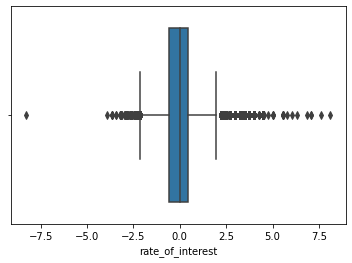

In [209]:
sns.boxplot(df_train_num_scaled['rate_of_interest']);

In [211]:
q1=df_train_num_scaled['rate_of_interest'].quantile(0.25)
q3=df_train_num_scaled['rate_of_interest'].quantile(0.75)
iqr=q3-q1
print(q1,q3,q1-3*iqr,q3+3*iqr)

-0.605778028213191 0.4193110302800769 -3.681045203692995 3.494578205759881


In [198]:
x_vif=df_train_final

y=df_train['Status']

rf=RandomForestClassifier()
rf_model=rf.fit(x_vif,y)

ypred_rf=rf_model.predict(df_test_final)


In [199]:
ypred_rf[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [200]:
ypred_rf_df=pd.DataFrame(ypred_rf,columns=['Status'])

submission_3=pd.concat([df_test_1['ID'],ypred_rf_df],axis=1)
submission_3.to_csv('ver_3.csv',index=False)

In [212]:
xgb=XGBClassifier()
xgb_model=xgb.fit(x_vif,y)

ypred_xgb=xgb_model.predict(df_test_final)


[20:53:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [213]:
ypred_xgb_df=pd.DataFrame(ypred_xgb,columns=['Status'])

submission_5=pd.concat([df_test_1['ID'],ypred_xgb_df],axis=1)
submission_5.to_csv('ver_5.csv',index=False)

In [242]:
base_learners = [('Ada boost', AdaBoostClassifier()),
                ('XGBoost model',XGBClassifier())]

stack_model_XGBoost = StackingClassifier(estimators = base_learners, final_estimator = XGBClassifier())
stack_model_XGBoost=stack_model_XGBoost.fit(x_vif,y)

ypred_stack=stack_model_XGBoost.predict(df_test_final)


[22:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:21:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:21:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [243]:
ypred_stack_df=pd.DataFrame(ypred_stack,columns=['Status'])

submission_14=pd.concat([df_test_1['ID'],ypred_stack_df],axis=1)
submission_14.to_csv('ver_14.csv',index=False)

In [222]:
nb=GaussianNB()
nb_model=nb.fit(x_vif,y)

ypred_nb=nb_model.predict(df_test_final)


In [223]:
ypred_nb_df=pd.DataFrame(ypred_nb,columns=['Status'])

submission_8=pd.concat([df_test_1['ID'],ypred_nb_df],axis=1)
submission_8.to_csv('ver_8.csv',index=False)

In [228]:
ada=AdaBoostClassifier()
ada_model=ada.fit(x_vif,y)

ypred_ada=ada_model.predict(df_test_final)


In [229]:
ypred_ada_df=pd.DataFrame(ypred_ada,columns=['Status'])

submission_9=pd.concat([df_test_1['ID'],ypred_ada_df],axis=1)
submission_9.to_csv('ver_9.csv',index=False)

In [230]:
ada=AdaBoostClassifier()
ada_model=ada.fit(X_bal,y_bal)

ypred_ada=ada_model.predict(df_test_final)


In [231]:
ypred_ada_df=pd.DataFrame(ypred_ada,columns=['Status'])

submission_9=pd.concat([df_test_1['ID'],ypred_ada_df],axis=1)
submission_9.to_csv('ver_9.csv',index=False)

In [232]:
xgb=XGBClassifier()
xgb_model=xgb.fit(X_bal,y_bal)

ypred_xgb=xgb_model.predict(df_test_final)


[22:02:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [233]:
ypred_xgb_df=pd.DataFrame(ypred_xgb,columns=['Status'])

submission_10=pd.concat([df_test_1['ID'],ypred_xgb_df],axis=1)
submission_10.to_csv('ver_10.csv',index=False)

In [236]:
gb=GradientBoostingClassifier()
gb_model=gb.fit(x_vif,y)

ypred_gb=gb_model.predict(df_test_final)


In [237]:
ypred_gb_df=pd.DataFrame(ypred_gb,columns=['Status'])

submission_11=pd.concat([df_test_1['ID'],ypred_gb_df],axis=1)
submission_11.to_csv('ver_11.csv',index=False)

In [238]:
gb=GradientBoostingClassifier()
gb_model=gb.fit(X_bal,y_bal)

ypred_gb=gb_model.predict(df_test_final)


In [239]:
ypred_gb_df=pd.DataFrame(ypred_gb,columns=['Status'])

submission_12=pd.concat([df_test_1['ID'],ypred_gb_df],axis=1)
submission_12.to_csv('ver_12.csv',index=False)

In [240]:
lr=LogisticRegression()
lr_model=lr.fit(x_vif,y)

ypred_lr=lr_model.predict(df_test_final)


In [241]:
ypred_lr_df=pd.DataFrame(ypred_lr,columns=['Status'])

submission_13=pd.concat([df_test_1['ID'],ypred_lr_df],axis=1)
submission_13.to_csv('ver_13.csv',index=False)

In [244]:
knn=KNeighborsClassifier()
knn_model=knn.fit(X_bal,y_bal)

ypred_knn=knn_model.predict(df_test_final)


In [245]:
ypred_knn_df=pd.DataFrame(ypred_knn,columns=['Status'])

submission_15=pd.concat([df_test_1['ID'],ypred_knn_df],axis=1)
submission_15.to_csv('ver_15.csv',index=False)

In [246]:
knn=KNeighborsClassifier()
knn_model=knn.fit(x_vif,y)

ypred_knn=knn_model.predict(df_test_final)


In [247]:
ypred_knn_df=pd.DataFrame(ypred_knn,columns=['Status'])

submission_16=pd.concat([df_test_1['ID'],ypred_knn_df],axis=1)
submission_16.to_csv('ver_16.csv',index=False)

In [250]:
tuned_paramaters = [{'n_estimators': [100, 120, 150],
                     }]
 
# instantiate the 'AdaBoostClassifier'
# pass the 'random_state' to obtain the same results for each code implementation
xgb_mod = XGBClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
# n_jobs=-1 tells the model to use all the central processing units 
xgb_grid = GridSearchCV(estimator = xgb_mod, 
                         param_grid = tuned_paramaters, 
                         cv = 5,
                         n_jobs=-1)

# fit the model on X_train and y_train using fit()
xgb_grid.fit(x_vif, y)
xgb_grid.best_params_,

[23:30:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'learning_rate': 0.1, 'n_estimators': 100},)

In [259]:
xgb=XGBClassifier(learning_rate=0.5,gamma=3,max_depth=10)
xgb_model=xgb.fit(x_vif,y)

ypred_xgb=xgb_model.predict(df_test_final)


[23:51:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [261]:
ypred_xgb_df=pd.DataFrame(ypred_xgb,columns=['Status'])

submission_21=pd.concat([df_test_1['ID'],ypred_xgb_df],axis=1)
submission_21.to_csv('ver_21.csv',index=False)

In [264]:
from sklearn import svm
svm=svm.SVC()
svm_model=svm.fit(x_vif,y)

ypred_svm=svm_model.predict(df_test_final)


ypred_svm_df=pd.DataFrame(ypred_svm,columns=['Status'])

submission_22=pd.concat([df_test_1['ID'],ypred_svm_df],axis=1)
submission_22.to_csv('ver_22.csv',index=False)



In [266]:
df_test_cat_dummies1=pd.get_dummies(df_test_cat,drop_first=True)
df_test_cat_dummies1.head()

,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l2,open_credit_opc,business_or_commercial_nob/c,Neg_ammortization_not_neg,interest_only_not_int,lump_sum_payment_not_lpsm,construction_type_sb,occupancy_type_pr,occupancy_type_sr,Secured_by_land,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1
2,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1


In [276]:
df_test_final1=pd.concat([df_test_num_scaled,df_test_cat_dummies1],axis=1)
df_test_final1.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,Credit_Worthiness_l2,open_credit_opc,business_or_commercial_nob/c,Neg_ammortization_not_neg,interest_only_not_int,lump_sum_payment_not_lpsm,construction_type_sb,occupancy_type_pr,occupancy_type_sr,Secured_by_land,total_units_2U,total_units_3U,total_units_4U,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,-0.351832,0.166634,0.357805,-0.622890,-1.631753,-0.524488,-1.558357,-1.711335,0.266411,-2.057612,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,-1.158243,1.941540,0.607918,-0.411067,0.422944,-0.864893,-0.265089,-1.504588,-0.221886,0.008696,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1
2,-0.728157,-0.000000,-0.089801,-0.170186,0.422944,-0.808159,1.531117,1.088358,0.424389,2.178319,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
3,-1.158243,1.449081,0.210245,-0.608407,0.422944,-1.035096,2.489093,-0.944650,0.355681,0.421957,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4,-0.136789,-0.000000,-0.089801,-0.170186,0.422944,-0.496121,1.914308,-0.884348,0.462416,0.938534,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1


In [281]:
df_train_cat_dummies1=pd.get_dummies(df_train_cat,drop_first=True)
df_train_cat_dummies1.head()
df_train_cat_dummies1.rename(columns={'age_<25':'age_25', 'age_>74':'age_74'},inplace=True)
#df_train_cat_dummies1.columns

In [282]:
df_train_final1=pd.concat([df_train_num_scaled,df_train_cat_dummies1],axis=1)
df_train_final1.columns

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'dtir1', 'loan_limit_ncf', 'Gender_Joint', 'Gender_Male',
       'Gender_Sex Not Available', 'approv_in_adv_pre', 'loan_type_type2',
       'loan_type_type3', 'loan_purpose_p2', 'loan_purpose_p3',
       'loan_purpose_p4', 'Credit_Worthiness_l2', 'open_credit_opc',
       'business_or_commercial_nob/c', 'Neg_ammortization_not_neg',
       'interest_only_not_int', 'lump_sum_payment_not_lpsm',
       'construction_type_sb', 'occupancy_type_pr', 'occupancy_type_sr',
       'Secured_by_land', 'total_units_2U', 'total_units_3U', 'total_units_4U',
       'credit_type_CRIF', 'credit_type_EQUI', 'credit_type_EXP',
       'co-applicant_credit_type_EXP', 'age_35-44', 'age_45-54', 'age_55-64',
       'age_65-74', 'age_25', 'age_74', 'submission_of_application_to_inst',
       'Region_North-East', 'Region_central', 'Region_south',
       'Sec

In [283]:
x_a=df_train_final1
y_a=df_train['Status']

xgb=XGBClassifier(learning_rate=0.1)
xgb_model=xgb.fit(x_a,y_a)

ypred_xgb=xgb_model.predict(df_test_final1)

ypred_xgb_df=pd.DataFrame(ypred_xgb,columns=['Status'])

submission_23=pd.concat([df_test_1['ID'],ypred_xgb_df],axis=1)
submission_23.to_csv('ver_23.csv',index=False)

[12:10:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [284]:
from sklearn import svm
svm=svm.SVC()
svm_model=svm.fit(x_a,y_a)

ypred_svm=svm_model.predict(df_test_final1)


ypred_svm_df=pd.DataFrame(ypred_svm,columns=['Status'])

submission_24=pd.concat([df_test_1['ID'],ypred_svm_df],axis=1)
submission_24.to_csv('ver_24.csv',index=False)


In [286]:
from sklearn import svm
svm=svm.SVC()
svm_model=svm.fit(X_bal,y_bal)

ypred_svm=svm_model.predict(df_test_final)


ypred_svm_df=pd.DataFrame(ypred_svm,columns=['Status'])

submission_25=pd.concat([df_test_1['ID'],ypred_svm_df],axis=1)
submission_25.to_csv('ver_25.csv',index=False)
